In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt

In [ ]:
# Function to add Poisson noise to an image
def add_poisson_noise(image):
    # Scale image to range [0, 1]
    image = image / 255.0
    # Generate Poisson noise
    noisy_image = np.random.poisson(image * 255) / 255.0
    # Clip the values to range [0, 1] and scale back to [0, 255]
    noisy_image = np.clip(noisy_image, 0, 1) * 255
    return noisy_image.astype(np.uint8)


In [ ]:
# Input zip file and output directories
input_zip = "/content/drive/MyDrive/DSCOVER/2학기 메인프로젝트/fdct_data_512.zip"  # path to the high-dose CT dataset zip file (only test data)

# Extract the zip file
temp_extract_dir = "temp_dir"
with zipfile.ZipFile(input_zip, 'r') as zip_ref:
    zip_ref.extractall(temp_extract_dir)
print('압축 해제 완료')

압축 해제 완료


In [ ]:
output_root = "/content/ldct"  # path to save the low-dose CT dataset

# Create output directory structure
if not os.path.exists(output_root):
    os.makedirs(output_root)


In [ ]:
dir = '/content/temp_dir/fdct_data_512'

In [ ]:
# Iterate over each class folder

classes = ["adenocarcinoma", "large.cell.carcinoma", "normal", "squamous.cell.carcinoma"]
datafolder_name = ['train','valid', 'test']
for datafolder in datafolder_name:
  cdir = os.path.join(output_root, datafolder)
  os.makedirs(cdir, exist_ok=True)
  for cls in classes:
      input_dir = os.path.join(cdir, cls)
      output_dir = os.path.join(output_root, cls)
      os.makedirs(output_dir, exist_ok=True)

      # Process each image in the class folder
      for filename in os.listdir(input_dir):
          # Read the image
          input_path = os.path.join(input_dir, filename)
          image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)  # Assuming CT images are grayscale

          # Add Poisson noise
          noisy_image = add_poisson_noise(image)

          # Save the noisy image
          output_path = os.path.join(output_dir, filename)
          cv2.imwrite(output_path, noisy_image)


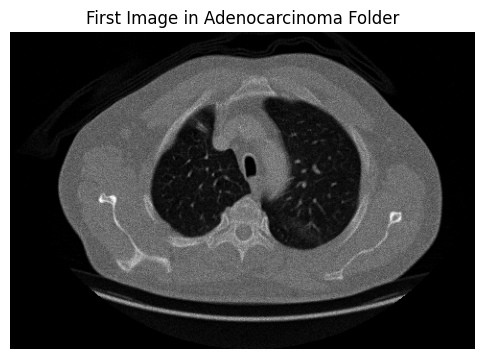

In [ ]:
# Visualize the first image in the adenocarcinoma folder
adenocarcinoma_dir = os.path.join(output_root, "adenocarcinoma")
if os.path.exists(adenocarcinoma_dir):
    first_image_path = os.path.join(adenocarcinoma_dir, os.listdir(adenocarcinoma_dir)[0])
    first_image = cv2.imread(first_image_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(6, 6))
    plt.title("First Image in Adenocarcinoma Folder")
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')
    plt.show();

In [ ]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [ ]:
# 노이즈가 제대로 추가되었는지 psnr, ssim 확인
# Compare noise in the first image
low_dose_dir = "/content/ldct/test_for_low_dose/adenocarcinoma"
high_dose_dir = os.path.join('/content/ldct', "adenocarcinoma")

if os.path.exists(low_dose_dir) and os.path.exists(high_dose_dir):
    low_dose_image_path = os.path.join(low_dose_dir, os.listdir(low_dose_dir)[0])
    high_dose_image_path = os.path.join(high_dose_dir, os.listdir(high_dose_dir)[0])

    low_dose_image = cv2.imread(low_dose_image_path, cv2.IMREAD_GRAYSCALE)
    high_dose_image = cv2.imread(high_dose_image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate PSNR and SSIM
    noise_psnr = psnr(high_dose_image, low_dose_image, data_range=255)
    noise_ssim = ssim(high_dose_image, low_dose_image, data_range=255)

    print(f"PSNR between high-dose and low-dose image: {noise_psnr:.2f}")
    print(f"SSIM between high-dose and low-dose image: {noise_ssim:.4f}")

In [ ]:
# 다운
folder_path = '/content/path_to_low_dose_ct'
# 압축 파일 저장 경로 설정
zip_file_path = '/content/low_dose_ct.zip'

# zip 파일 생성
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

print("압축 파일 생성 완료:", zip_file_path)

압축 파일 생성 완료: /content/low_dose_ct.zip
